In [1]:
from vcat import ImageData

Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....



Image of the source 3C111 at frequency 8.4 GHz on 2014-05-08 
    Total cleaned flux: 3815.199 mJy 
    Image Noise: 0.246 mJy using method 'Histogram Fit'
Polarization information:
    Pol Flux: 7.193 mJy (0.19%)
    Pol Noise: 0.319 mJy using method 'Histogram Fit'
    Average EVPA direction: 83.07°
Model information: 
    Model Flux: 3821.649 mJy 
    Number of Components: 9


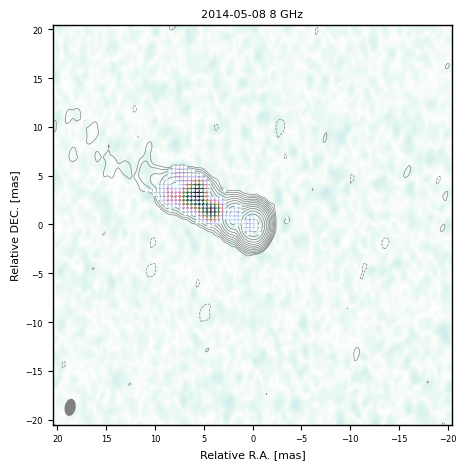

In [2]:
#Import some test data
data=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits",
              uvf_file="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.uvf",
               model="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.modelfits",
               stokes_q="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.qcln",
               stokes_u="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.ucln",
              difmap_path="/usr/local/difmap/uvf_difmap_2.5g/")

#print basic image info
print(data)

#plot image
data.plot(plot_mode="lin_pol",plot_evpa=True)

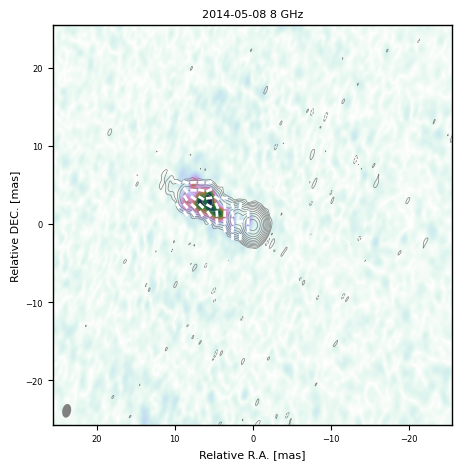

In [27]:
#We will now perform different image operations for demonstration purposes
#Throughout the tutorial you can choose whether to do the steps using DIFMAP or
# running everything on the image plane. The DIFMAP option only works with a loaded .uvf file
useDIFMAP=True

#Let's start with a simple regrid of the image to 1024x1024,0.1mas pixelsize
data_regrid=data.regrid(512,0.1,useDIFMAP=useDIFMAP)

#plot the result
data_regrid.plot(plot_mode="lin_pol",plot_evpa=True)

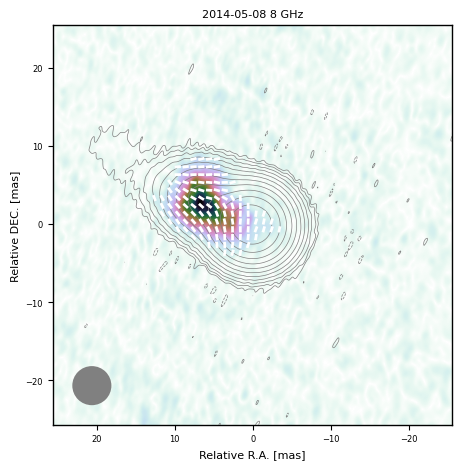

In [28]:
#Let's try restoring the image with a custom beam (maj 5 mas, min 5 mas, posa 0°)
data_restored=data_regrid.restore(5,5,0,useDIFMAP=useDIFMAP)

#plot the result
data_restored.plot(plot_mode="lin_pol",plot_evpa=True)

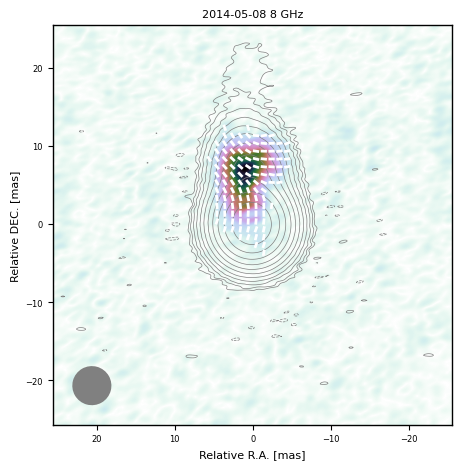

In [29]:
#Let's try rotating the image by a given angle (-60 degrees)
data_rotated = data_restored.rotate(-60,useDIFMAP=useDIFMAP)

#plot the result
data_rotated.plot(plot_mode="lin_pol",plot_evpa=True)

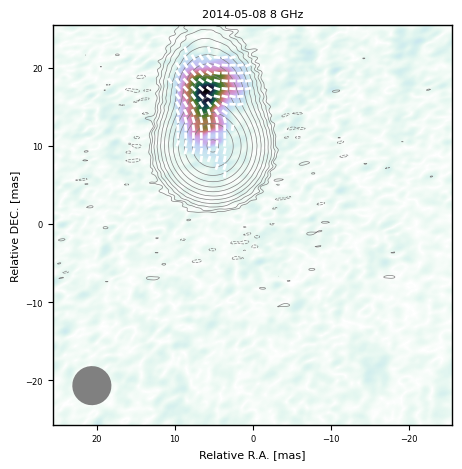

In [30]:
#Let's try shifting the image by 5mas in x-direction and 10mas in y-direction
data_shifted = data_rotated.shift(5,10,useDIFMAP=useDIFMAP)

#plot the result
data_shifted.plot(plot_mode="lin_pol",plot_evpa=True)

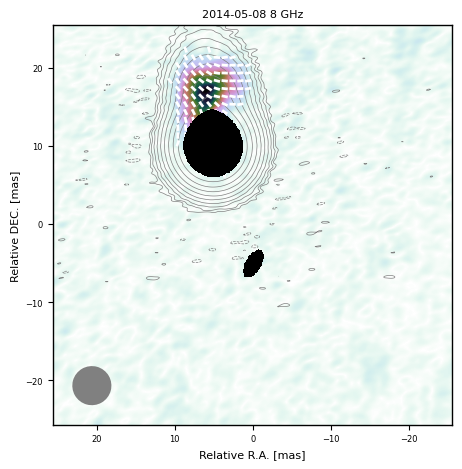

In [41]:
#Additionally, you can apply various masks to your image
#reset all masks first
data_shifted.masking(mask_type="reset")

#Then we will mask with a flux cut
data_shifted.masking(mask_type="flux_cut",args=0.2)

#Additional masking options are:
data_shifted.masking(mask_type="ellipse",args={'e_args':[20,10,30],'e_xoffset':0,'e_yoffset':-50})
#data_shifted.masking(mask_type="radius",args=5)
#data_shifted.masking(mask_type="cut_right",args=200)
#data_shifted.masking(mask_type="cut_left",args=200)
#data_shifted.masking(mask_type="npix_x",args=[100,200])

data_shifted.plot(plot_mode="lin_pol",plot_evpa=True,plot_mask=True)